In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE2015/Project/Electric_Vehicle_Population_Data.csv')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 339
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [ ]:
data.shape

(153830, 17)

In [15]:
data[['Point','Longitude','Latitude']] = data['Vehicle Location'].str.split(' ',expand=True)
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Point,Longitude,Latitude
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,POINT,(-120.477805,46.553505)
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,POINT,(-122.34301,47.659185)
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,POINT,(-122.382425,47.77279)
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10,POINT,(-122.6880708,48.2179983)


In [16]:
data['Longitude'] = data['Longitude'].str.replace('(','')
data['Latitude'] = data['Latitude'].str.replace(')','')
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Point,Longitude,Latitude
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,POINT,-120.477805,46.553505
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,POINT,-122.34301,47.659185
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,POINT,-122.382425,47.77279
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10,POINT,-122.6880708,48.2179983


In [ ]:
data_dropped = data.drop(columns=['VIN (1-10)','Postal Code','Base MSRP','Legislative District','DOL Vehicle ID','2020 Census Tract','Point','Electric Range','Vehicle Location'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153830 entries, 0 to 153829
Data columns (total 11 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   County                                             153827 non-null  object
 1   City                                               153827 non-null  object
 2   State                                              153830 non-null  object
 3   Model Year                                         153830 non-null  int64 
 4   Make                                               153830 non-null  object
 5   Model                                              153830 non-null  object
 6   Electric Vehicle Type                              153830 non-null  object
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  153830 non-null  object
 8   Electric Utility                                   153827 non-null  object
 9   Long

In [ ]:
data.isnull().sum()

County                                               3
City                                                 3
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Utility                                     3
Longitude                                            7
Latitude                                             7
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

County                                               0
City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Utility                                     0
Longitude                                            0
Latitude                                             0
dtype: int64

In [ ]:
data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [ ]:
print(data['Make'].unique())
print(data['Make'].nunique())

['BMW' 'TESLA' 'NISSAN' 'CHEVROLET' 'JAGUAR' 'PORSCHE' 'AUDI' 'SUBARU'
 'FORD' 'POLESTAR' 'KIA' 'MERCEDES-BENZ' 'MITSUBISHI' 'VOLVO' 'JEEP'
 'VOLKSWAGEN' 'TOYOTA' 'RIVIAN' 'SMART' 'CHRYSLER' 'HYUNDAI' 'FIAT' 'MINI'
 'CADILLAC' 'GENESIS' 'LAND ROVER' 'HONDA' 'LEXUS' 'MAZDA' 'LUCID'
 'ALFA ROMEO' 'LINCOLN' 'FISKER' 'AZURE DYNAMICS' 'WHEEGO ELECTRIC CARS'
 'TH!NK' 'BENTLEY']
37


In [6]:
#car counts in the county of Yakima
df=data[data['County']=='Yakima']
df['Make'].value_counts()

TESLA            375
CHEVROLET         86
TOYOTA            54
FORD              49
KIA               44
JEEP              39
NISSAN            39
BMW               30
VOLKSWAGEN        18
RIVIAN            17
VOLVO             15
AUDI              15
MERCEDES-BENZ     12
CHRYSLER          11
HYUNDAI            9
PORSCHE            5
SUBARU             4
SMART              4
MITSUBISHI         3
LUCID              3
FIAT               3
MAZDA              2
HONDA              2
CADILLAC           1
ALFA ROMEO         1
JAGUAR             1
MINI               1
LAND ROVER         1
Name: Make, dtype: int64

In [ ]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Longitude,Latitude
0,Yakima,Yakima,WA,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,PACIFICORP,-120.477805,46.553505
25,Yakima,Yakima,WA,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PACIFICORP,-120.524012,46.5973939
41,Yakima,Yakima,WA,2023,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,PACIFICORP,-120.6027202,46.5965625
64,Yakima,Yakima,WA,2020,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PACIFICORP,-120.6027202,46.5965625
92,Yakima,Yakima,WA,2019,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,PACIFICORP,-120.524012,46.5973939


[30, 375, 49, 44, 12, 39, 86, 54, 18, 15, 9, 39, 15, 3, 3, 17, 5, 4, 2, 11, 4, 1, 3, 1, 1, 2, 1, 1]


<BarContainer object of 28 artists>

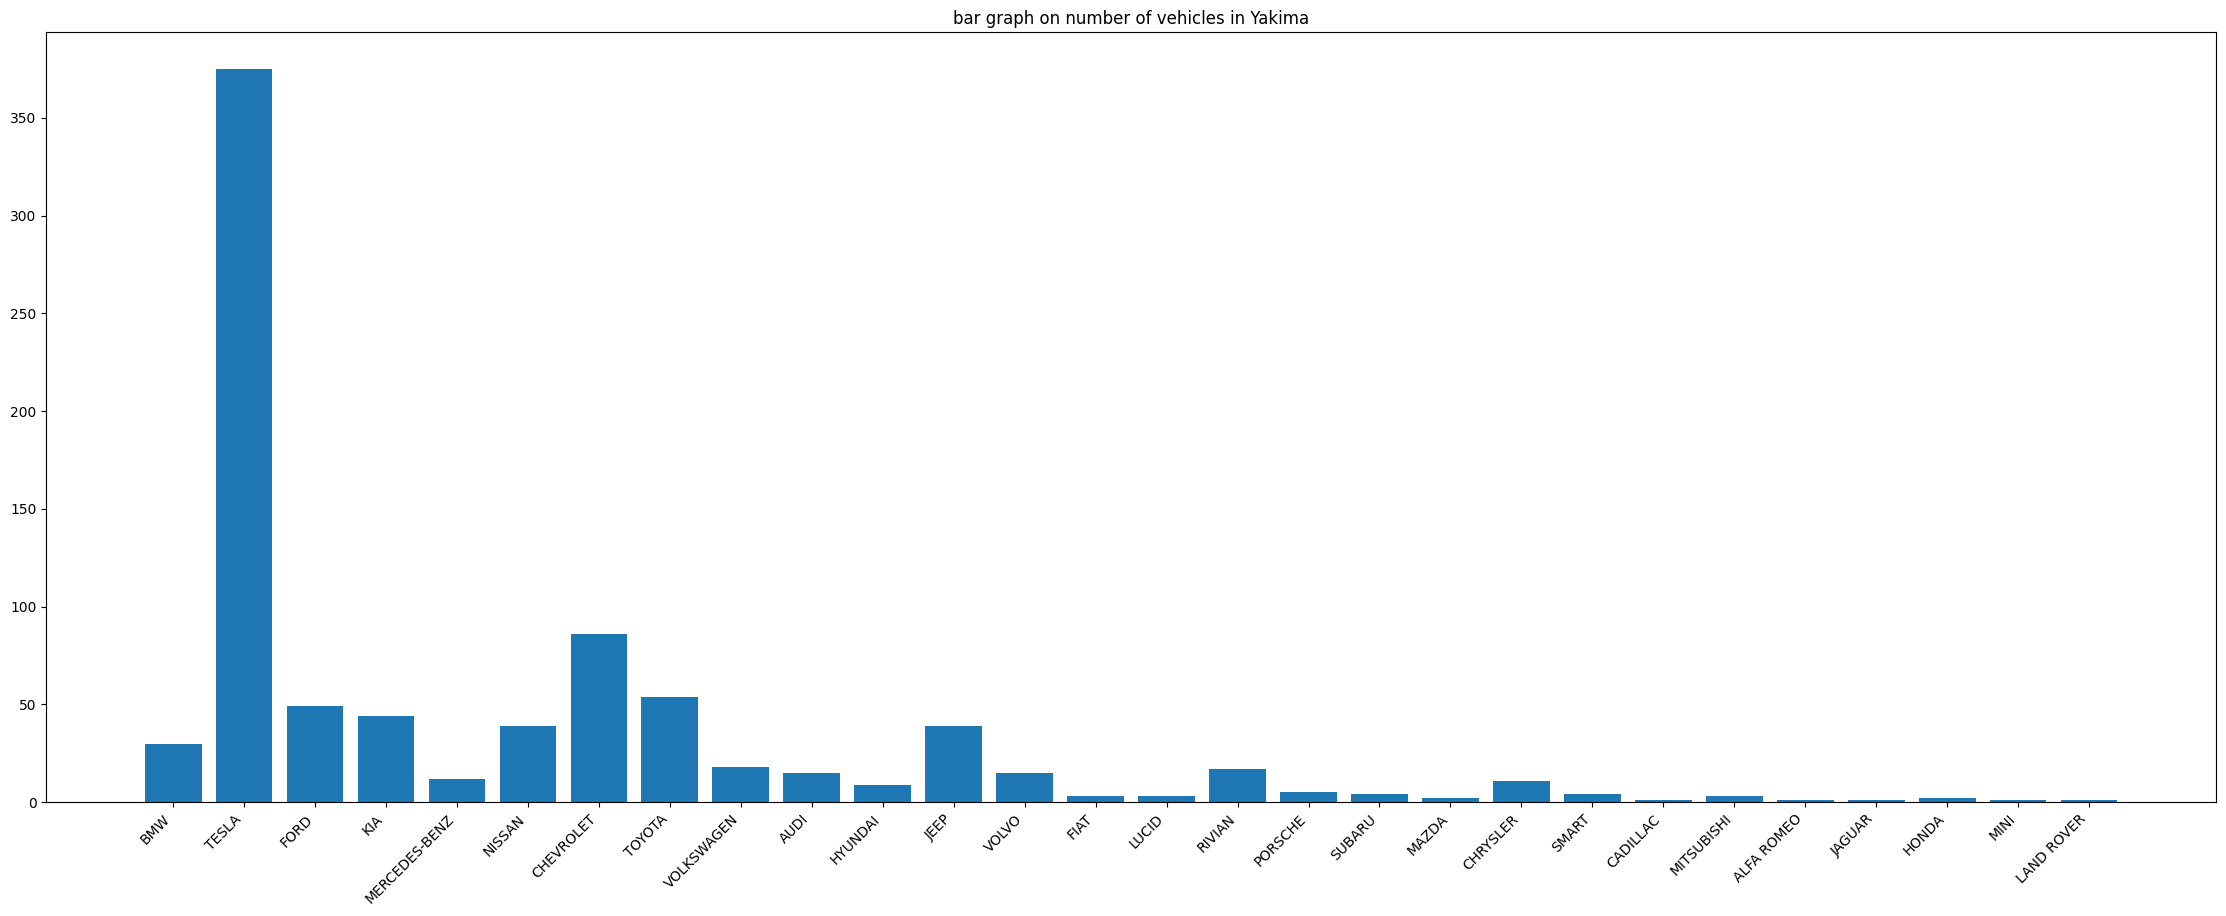

In [7]:
#bar graph on number of vehicles in Yakima
count_list=[]
for i in df['Make'].unique():
  counts=(df['Make']==i).value_counts()
  count_list.append(counts[True])
print(count_list)
plt.figure(figsize=(28,10))
plt.title('bar graph on number of vehicles in Yakima')
plt.xticks(rotation=45, ha='right')
plt.bar(df['Make'].unique(), count_list)

In [13]:
#plotting pie chart of making cars
Companies = data.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index
values = data.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values
px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)


In [ ]:
#plotting pie chart of vehicle type
Vehicle_type = list(data.groupby('Electric Vehicle Type').count()['County'].index)
values = data.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)

In [ ]:
#plotting locations
import geopandas as gpd
from shapely.geometry import Point
#import qeds
#qeds.themes.mpl_style();
data['Vehicle_Location'] = data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(data, geometry="Vehicle_Location")
gdf.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,Longitude,Latitude,Vehicle_Location
0,Yakima,Yakima,WA,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,PACIFICORP,-120.477805,46.553505,POINT (-120.47781 46.55351)
2,King,Seattle,WA,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.34301,47.659185,POINT (-122.34301 47.65919)
3,King,Shoreline,WA,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),-122.382425,47.77279,POINT (-122.38242 47.77279)
4,Island,Coupeville,WA,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC,-122.6880708,48.2179983,POINT (-122.68807 48.21800)
5,Kitsap,Seabeck,WA,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,PUGET SOUND ENERGY INC,-122.847462,47.63836,POINT (-122.84746 47.63836)


In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


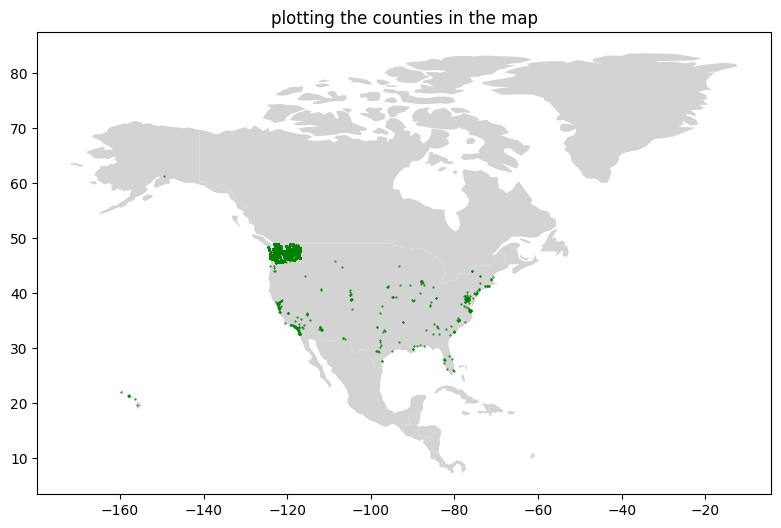

In [17]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the DataFrame
geometry = [Point(lon, lat) for lat, lon in zip(data['Latitude'], data['Longitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")
# Load a world basemap using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Filter the world GeoDataFrame to include only America
america = world[world['continent'] == 'North America']
# Plot the filtered basemap
ax = america.plot(figsize=(10, 6), color='lightgrey')
# Plot the points on top of the basemap
geo_df.plot(ax=ax, marker='o', color='green', markersize=0.25)
# Show the plot
plt.title('plotting the counties in the map')
plt.show()

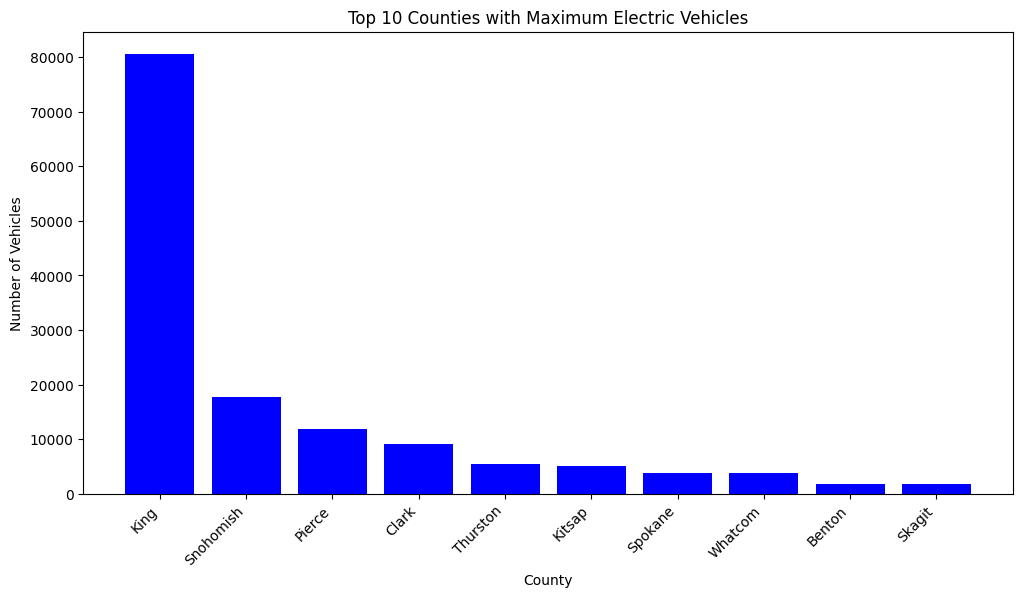

In [ ]:
#display the number of vehicle models in each county
import matplotlib.pyplot as plt

county_names = data['County'].unique()
county_vehicle_count = {}

for county in county_names:
    no_of_vehicles = data[data['County'] == county].shape[0]
    county_vehicle_count[county] = no_of_vehicles

# Sort the dictionary by the number of vehicles in descending order
sorted_county_vehicle_count = dict(sorted(county_vehicle_count.items(), key=lambda item: item[1], reverse=True))

# Select the top 10 counties
top_10_counties = dict(list(sorted_county_vehicle_count.items())[:10])

plt.figure(figsize=(12, 6))
plt.bar(top_10_counties.keys(), top_10_counties.values(), color='blue')
plt.xlabel('County')
plt.ylabel('Number of Vehicles')
plt.title('Top 10 Counties with Maximum Electric Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()


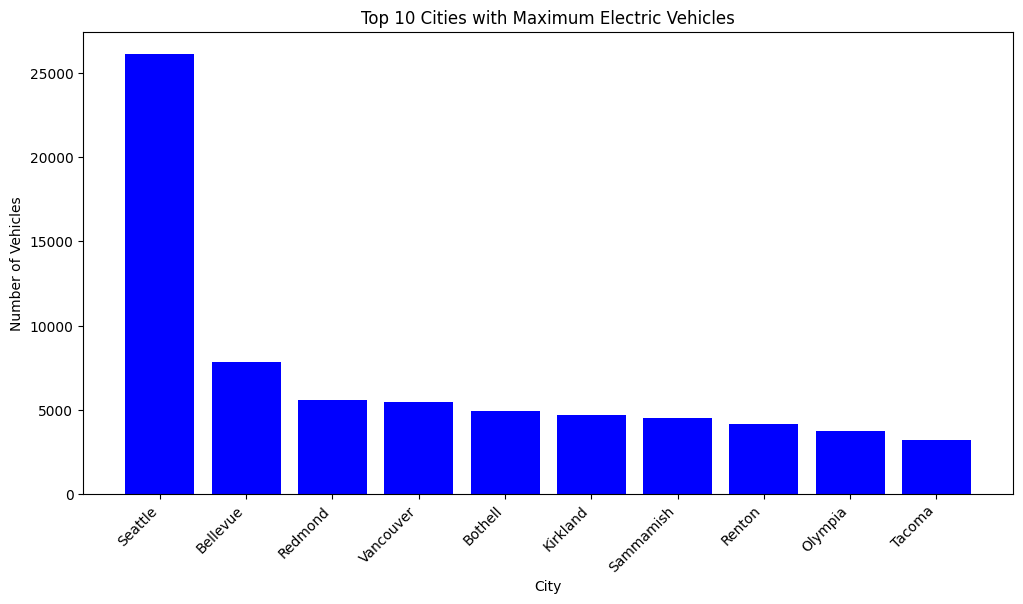

In [ ]:
import matplotlib.pyplot as plt

city_names = data['City'].unique()
city_vehicle_count = {}

for city in city_names:
    no_of_vehicles = data[data['City'] == city].shape[0]
    city_vehicle_count[city] = no_of_vehicles

sorted_city_vehicle_count = dict(sorted(city_vehicle_count.items(), key=lambda item: item[1], reverse=True))

top_10_cities = dict(list(sorted_city_vehicle_count.items())[:10])

plt.figure(figsize=(12, 6))
plt.bar(top_10_cities.keys(), top_10_cities.values(), color='blue')
plt.xlabel('City')
plt.ylabel('Number of Vehicles')
plt.title('Top 10 Cities with Maximum Electric Vehicles')
plt.xticks(rotation=45, ha='right')
plt.show()


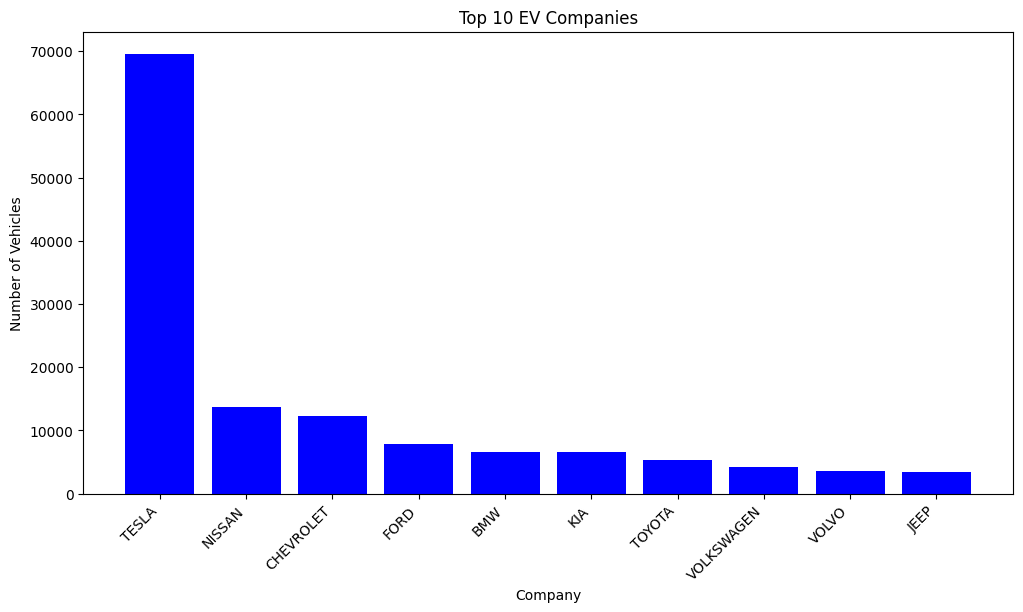

In [ ]:
import matplotlib.pyplot as plt

make_names = data['Make'].unique()
make_vehicle_count = {}

for make in make_names:
    no_of_vehicles = data[data['Make'] == make].shape[0]
    make_vehicle_count[make] = no_of_vehicles

sorted_make_vehicle_count = dict(sorted(make_vehicle_count.items(), key=lambda item: item[1], reverse=True))

top_10_makes = dict(list(sorted_make_vehicle_count.items())[:10])

plt.figure(figsize=(12, 6))
plt.bar(top_10_makes.keys(), top_10_makes.values(), color='blue')
plt.xlabel('Company')
plt.ylabel('Number of Vehicles')
plt.title('Top 10 EV Companies')
plt.xticks(rotation=45, ha='right')
plt.show()

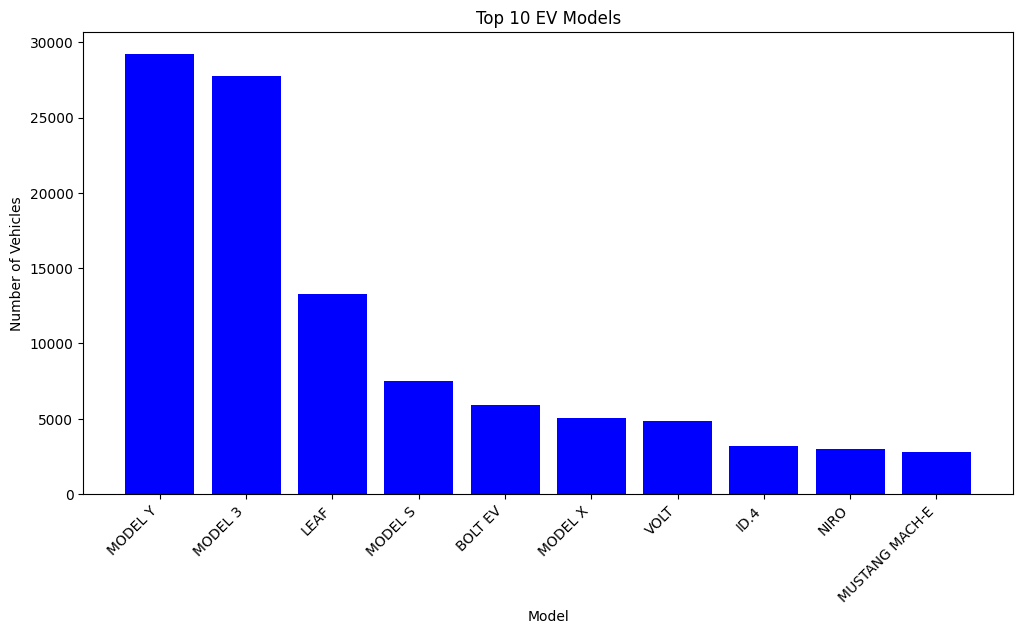

In [ ]:
import matplotlib.pyplot as plt

model_names = data['Model'].unique()
model_vehicle_count = {}

for model in model_names:
    no_of_vehicles = data[data['Model'] == model].shape[0]
    model_vehicle_count[model] = no_of_vehicles

sorted_model_vehicle_count = dict(sorted(model_vehicle_count.items(), key=lambda item: item[1], reverse=True))

top_10_models = dict(list(sorted_model_vehicle_count.items())[:10])

plt.figure(figsize=(12, 6))
plt.bar(top_10_models.keys(), top_10_models.values(), color='blue')
plt.xlabel('Model')
plt.ylabel('Number of Vehicles')
plt.title('Top 10 EV Models')
plt.xticks(rotation=45, ha='right')
plt.show()

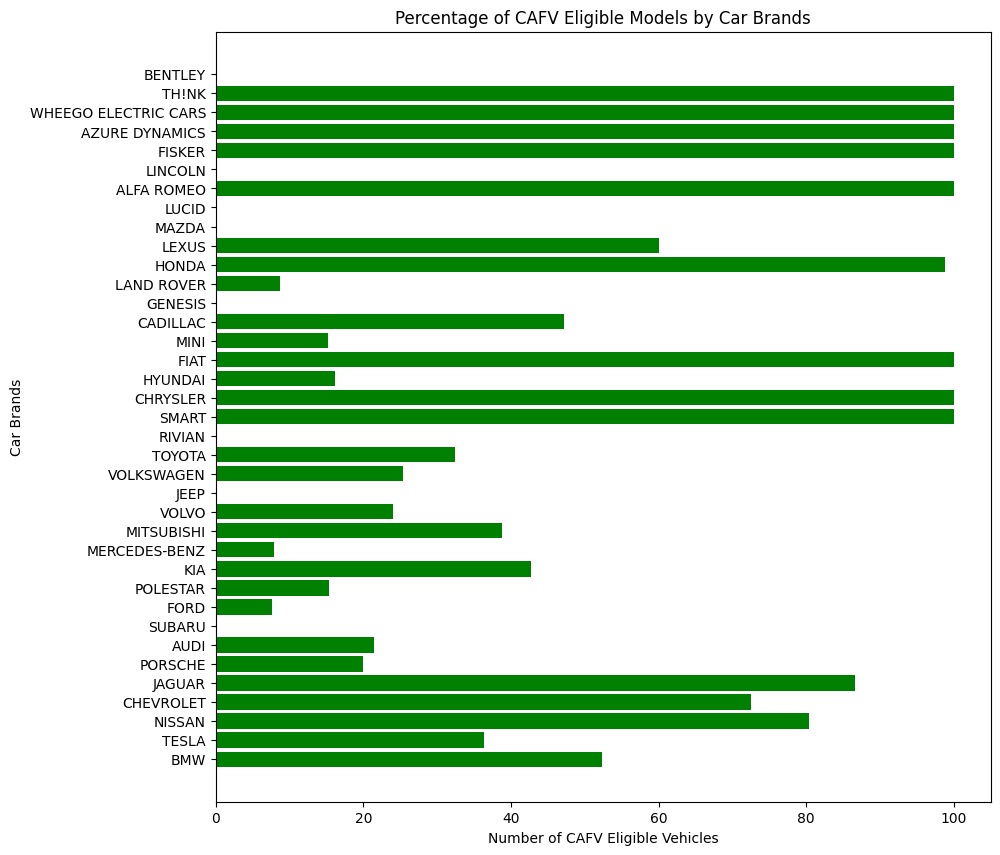

In [ ]:
#Number of CAFV Eligible Vehicles
import matplotlib.pyplot as plt

count = []
Brands = data["Make"].unique()

for x in Brands:
    df = data[data['Make'] == x]
    total_brands = len(df)
    i = (df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Clean Alternative Fuel Vehicle Eligible').sum()
    #print(i)
    #print(max_values)
    per = (i/total_brands)*100
    count.append(per)

plt.figure(figsize=(10, 10))
plt.barh(Brands, count, color="green")
plt.ylabel('Car Brands')
plt.xlabel('Number of CAFV Eligible Vehicles')
plt.title('Percentage of CAFV Eligible Models by Car Brands')
plt.show()

<BarContainer object of 2 artists>

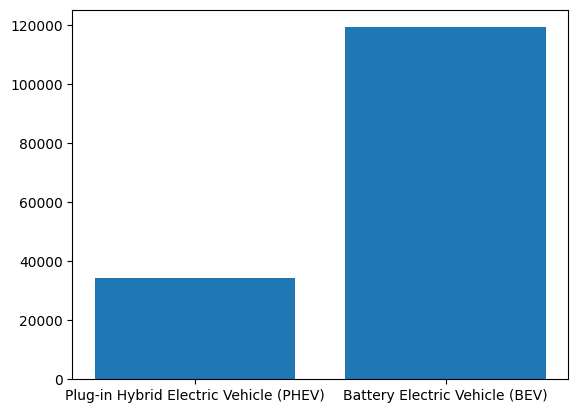

In [ ]:
data['Electric Vehicle Type'].unique()
no_of_vehicles_phev=(data['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)').sum()
no_of_vehicles_bev=(data['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)').sum()
count=[no_of_vehicles_phev, no_of_vehicles_bev]
plt.bar(data['Electric Vehicle Type'].unique(), count)

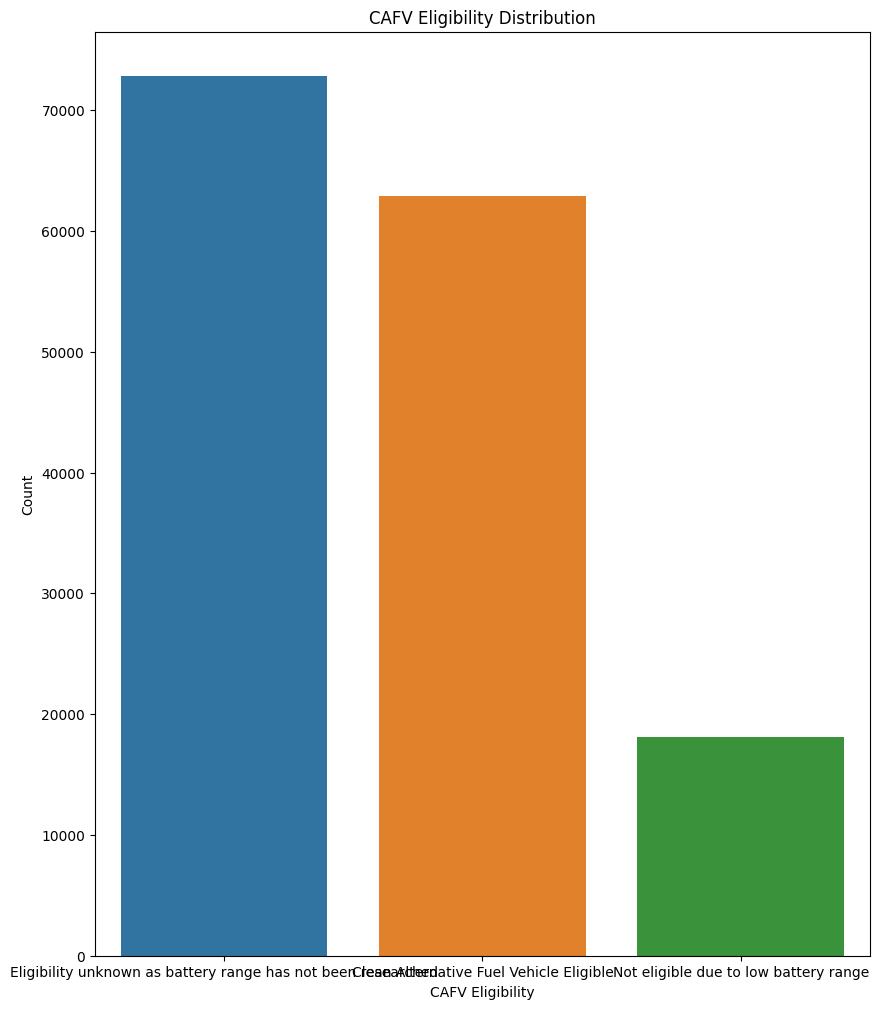

In [ ]:
import seaborn as sns
cafv_distribution = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().reset_index()
plt.figure(figsize=(10, 12))
sns.barplot(x='index', y='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=cafv_distribution)
plt.title('CAFV Eligibility Distribution')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

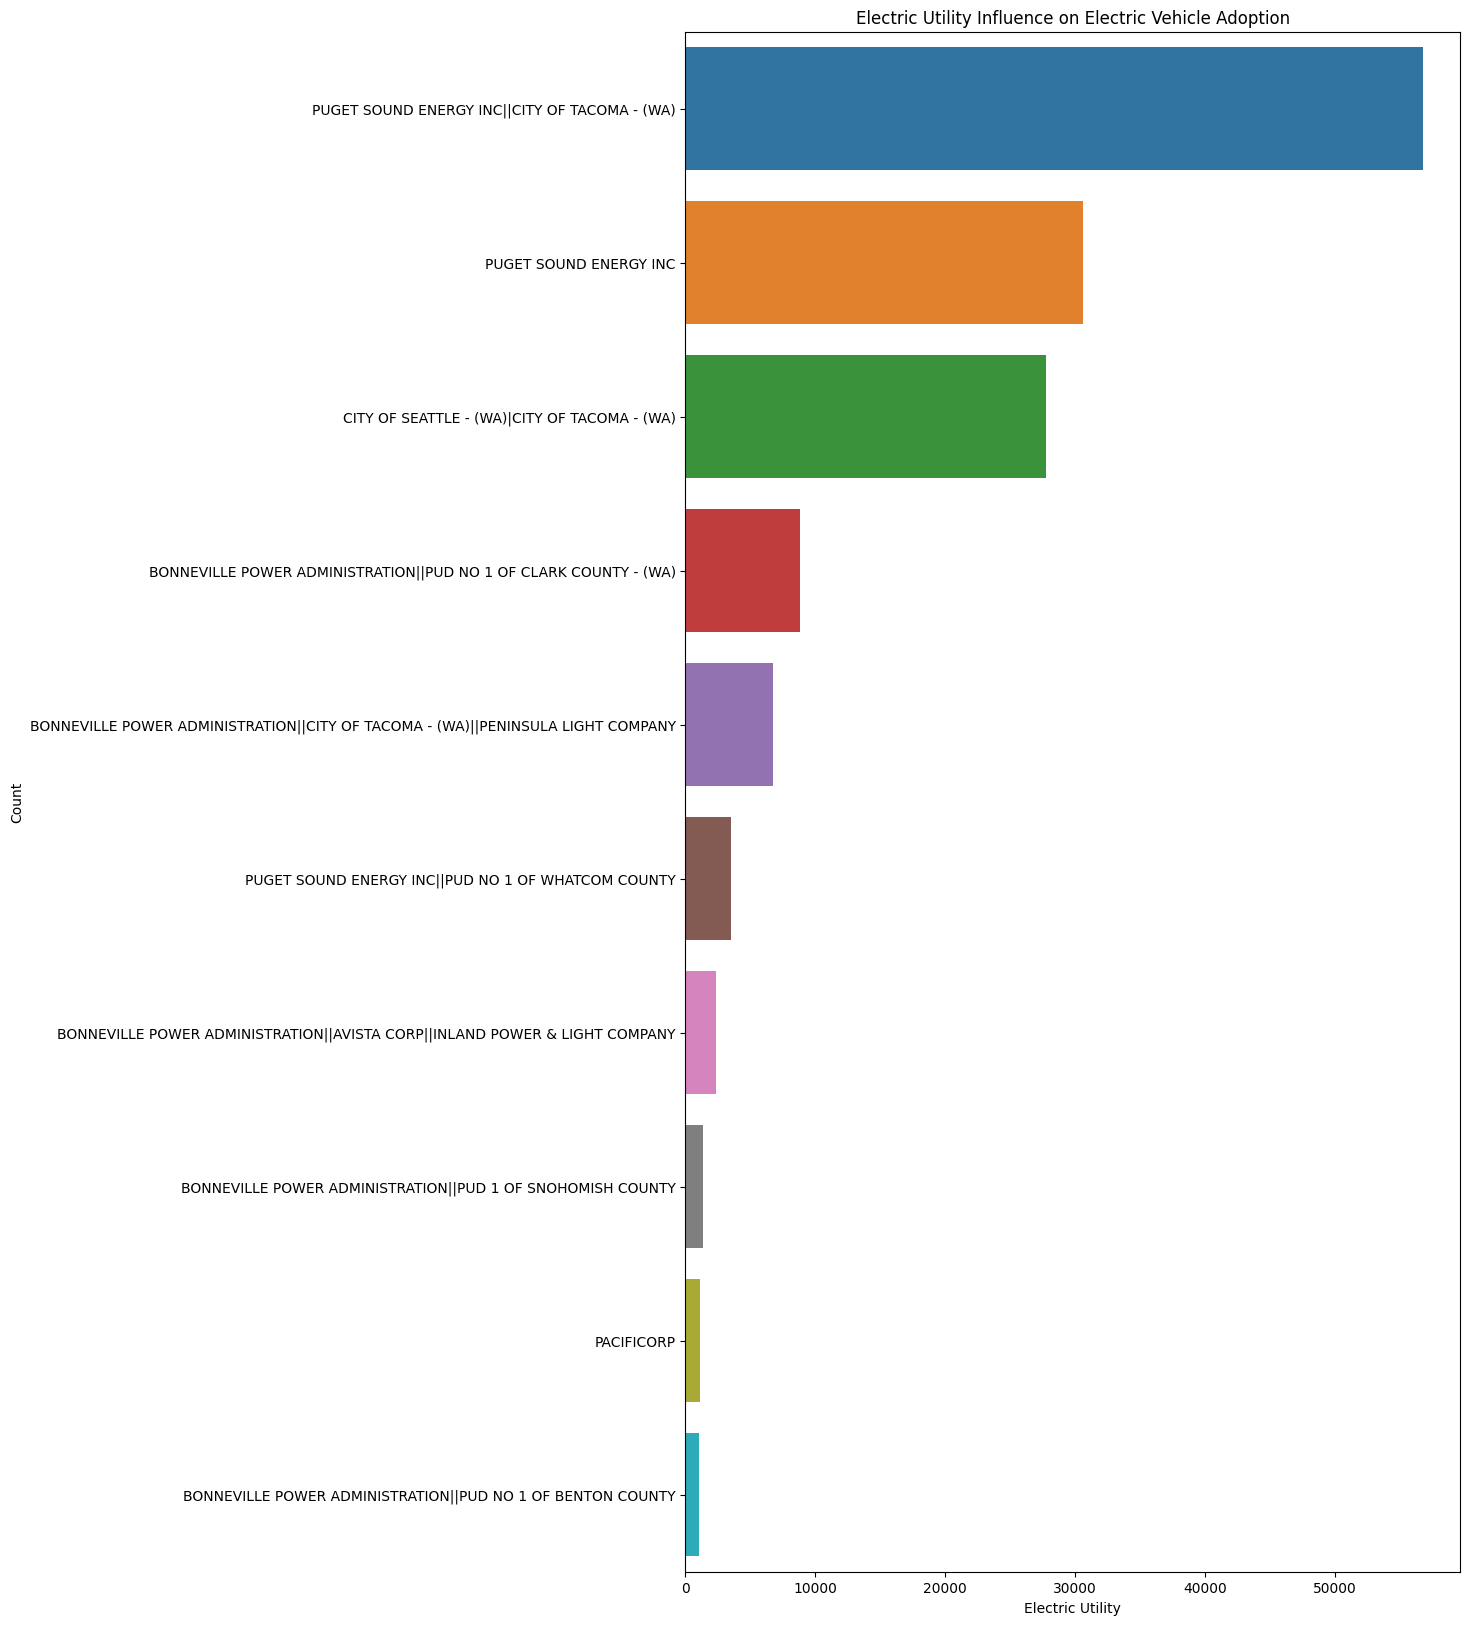

In [ ]:
import seaborn as sns
utility_distribution = data['Electric Utility'].value_counts().reset_index()
df_ud=utility_distribution.head(10)

plt.figure(figsize=(10, 20))
sns.barplot(y='index', x='Electric Utility', data=df_ud)
plt.title('Electric Utility Influence on Electric Vehicle Adoption')
plt.xlabel('Electric Utility')
plt.ylabel('Count')
plt.show()

In [ ]:
cross_tab = pd.crosstab(index=data['Make'], columns=data['Electric Vehicle Type'])

# Display the cross-tabulation
print("Cross-Tabulation between Make and Electric_Type:")
print(cross_tab)

Cross-Tabulation between Make and Electric_Type:
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
Make                                                    
ALFA ROMEO                                          0   
AUDI                                             1750   
AZURE DYNAMICS                                      8   
BENTLEY                                             0   
BMW                                              1916   
CADILLAC                                          101   
CHEVROLET                                        7374   
CHRYSLER                                            0   
FIAT                                              797   
FISKER                                              0   
FORD                                             4148   
GENESIS                                           117   
HONDA                                               0   
HYUNDAI                                          2902   
JAGUAR                                 